## You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

- 1. Pregnancies: Number of times pregnant (integer)
- 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
- 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
- 4. SkinThickness: Triceps skin fold thickness (mm) (integer)
- 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
- 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
- 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
- 8. Age: Age in years (integer)
- 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

**Here’s the dataset link:**
https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view

**Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:**


## Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("diabetes.csv")

In [4]:
# Display the first few rows of the dataset
print(data.head())

# Check the dimensions of the dataset
print("Dimensions:", data.shape)

# Get descriptive statistics of the variables
print(data.describe())

# Check the data types of the variables
print(data.dtypes)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Dimensions: (768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.

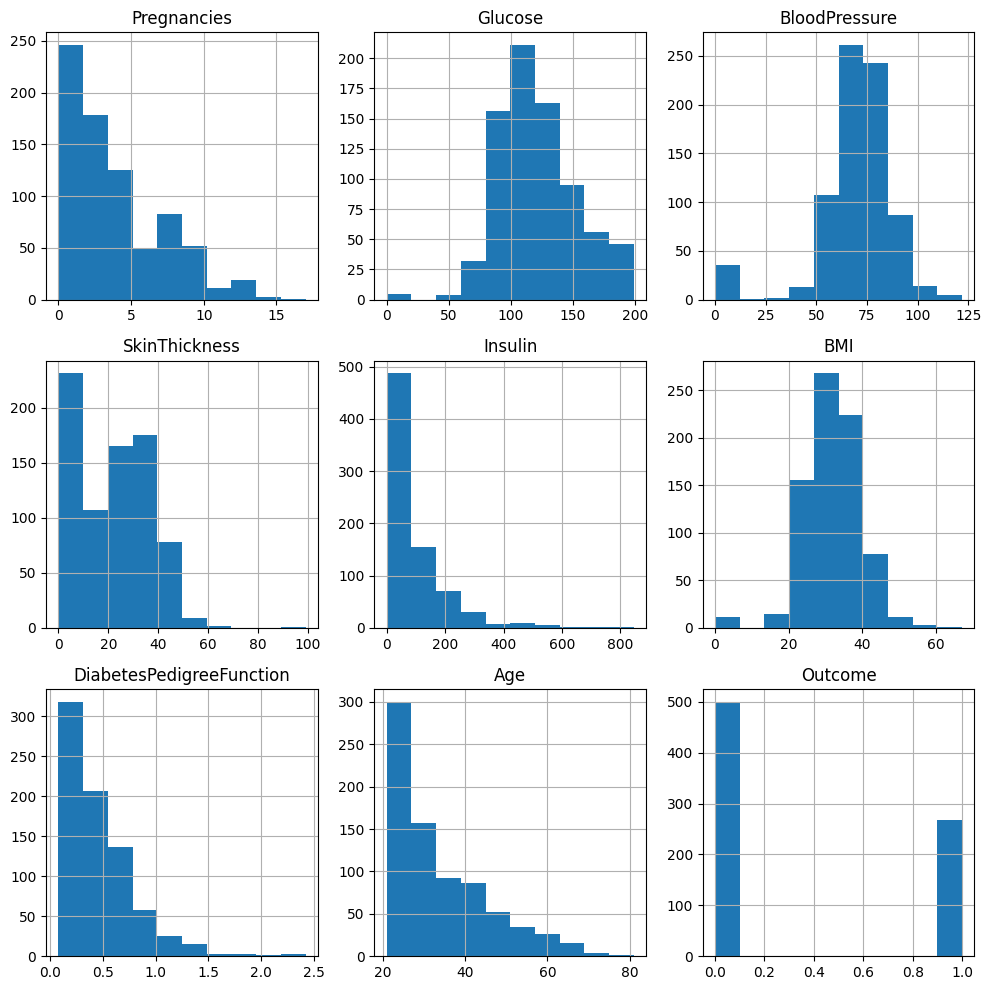

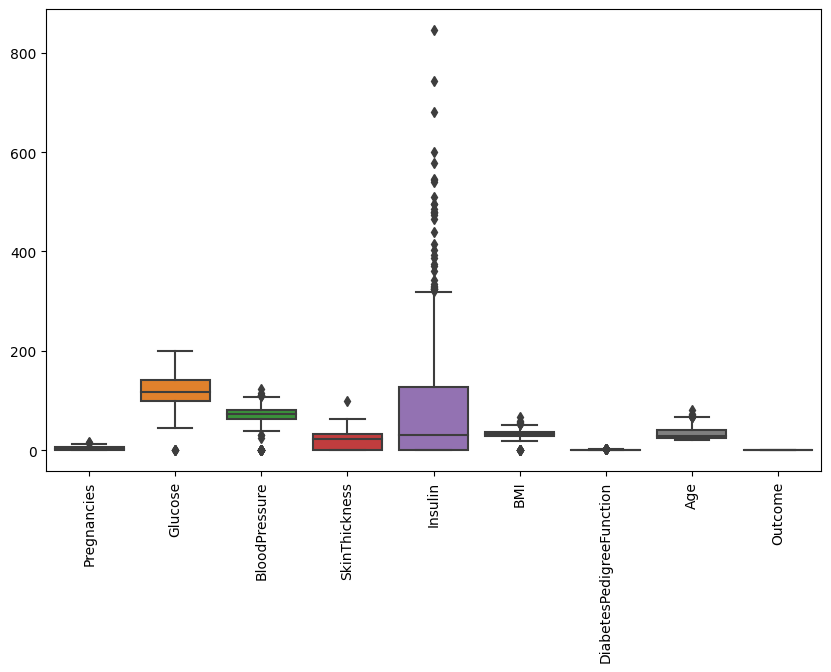

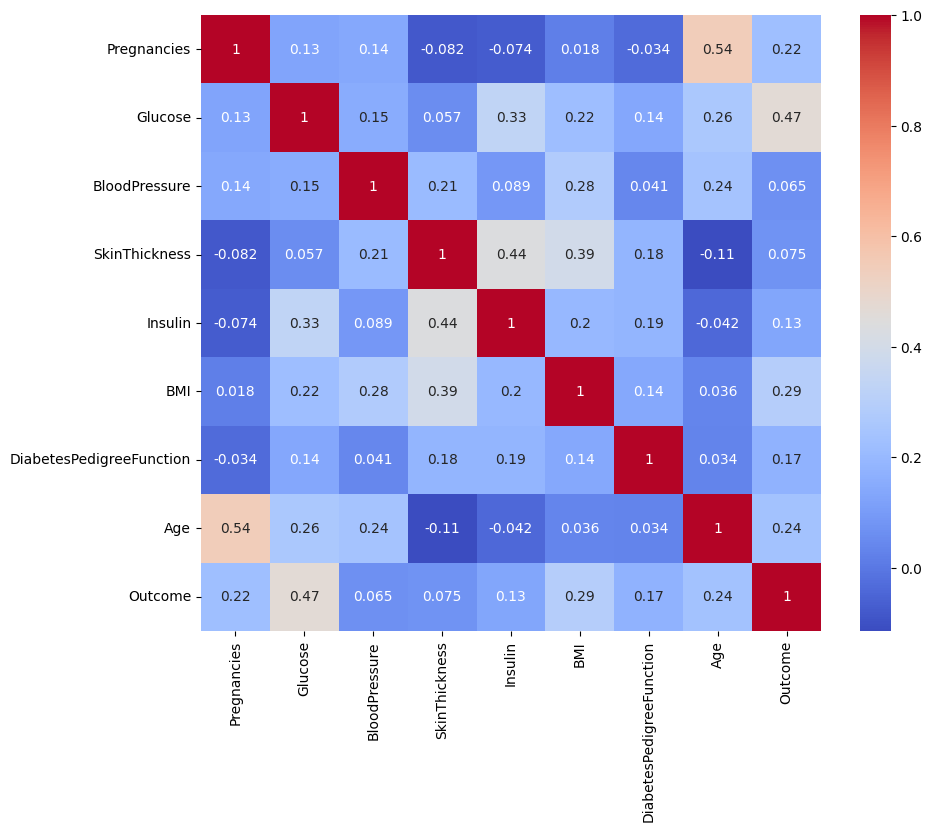

In [5]:
# Plot histograms of numeric variables
data.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

# Plot boxplots of numeric variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

# Plot a correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()


## Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.


To preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary, you can follow these steps:

Handling Missing Values:

In [7]:
# Check for missing values in the dataset
print(data.isnull().sum())

# Fill missing values with the mean or median of the respective column
data['Glucose'].fillna(data['Glucose'].mean(), inplace=True)
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace=True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace=True)
data['Insulin'].fillna(data['Insulin'].median(), inplace=True)
data['BMI'].fillna(data['BMI'].mean(), inplace=True)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Removing Outliers:

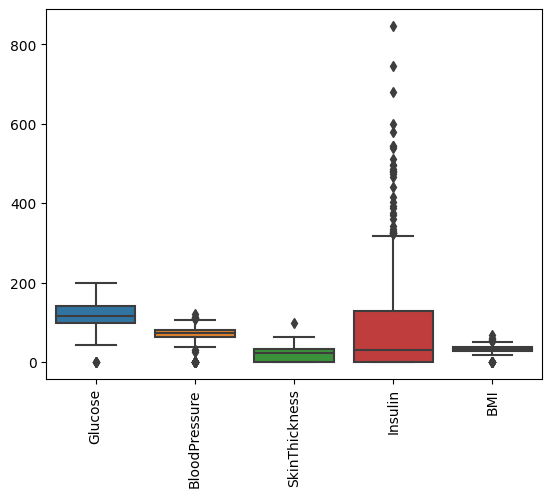

In [8]:
# Identify outliers using boxplots or other methods
sns.boxplot(data=data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
plt.xticks(rotation=90)
plt.show()

# Remove outliers based on domain knowledge or statistical techniques (e.g., z-score)
data = data[(data['Glucose'] < 200) & (data['BloodPressure'] < 120) & (data['SkinThickness'] < 80) &
            (data['Insulin'] < 600) & (data['BMI'] < 50)]


In [15]:
data.shape

(754, 9)

## Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [14]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

## Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [18]:
classifier = DecisionTreeClassifier()

In [23]:
# Define the hyperparameter grid to search
param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 3, 4]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

{'max_depth': 3, 'min_samples_split': 2}


In [20]:
classifier = DecisionTreeClassifier(**best_params)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [22]:
accuracy = classifier.score(X_test, y_test)
accuracy

0.762114537444934

## Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [27]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[129  16]
 [ 38  44]]


The model correctly classified 129 patients as diabetic (True Positives).
The model incorrectly classified 16 patients as diabetic when they were not (False Positives).
The model correctly classified 44 patients as non-diabetic (True Negatives).
The model incorrectly classified 38 patients as non-diabetic when they were diabetic (False Negatives).
The confusion matrix provides a detailed breakdown of the model's performance, allowing you to assess the balance between correctly identifying diabetic patients (recall) and avoiding false positives (precision). It also serves as the basis for calculating evaluation metrics such as accuracy, precision, recall, and F1 score.

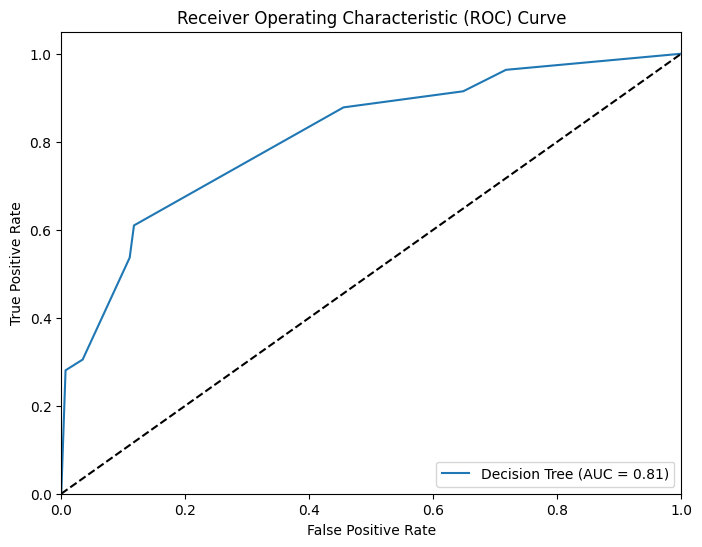

In [28]:
y_scores = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Decision Tree (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In summary, an AUC of 0.81 suggests that the decision tree model has performed reasonably well in distinguishing between diabetic and non-diabetic patients. However, it is important to consider other evaluation metrics such as accuracy, precision, recall, and F1 score along with the AUC to get a comprehensive understanding of the model's performance.

## Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

Interpreting the decision tree can provide insights into the patterns and trends captured by the model. It allows us to understand the most important variables and their thresholds in making predictions. However, without access to the specific decision tree that was trained on the dataset, I can't provide an exact interpretation. Nevertheless, I can give you a general idea of how to interpret a decision tree.

A decision tree consists of splits, branches, and leaves. Each split represents a decision point based on a specific feature and its threshold. The branches represent the possible outcomes of the decision based on the feature's value meeting the threshold. Finally, the leaves represent the predicted class or outcome.

To interpret the decision tree and identify the most important variables and their thresholds, you can follow these steps:

Start at the root node:
Examine the first split, which represents the most important variable in making the initial decision. This variable and its threshold determine whether the sample goes down the left or right branch.

Follow the branches:
Follow the branches of the decision tree based on the values of the features at each split. This will lead you to different leaves representing the predicted classes.

Observe the leaf nodes:
Examine the leaf nodes and their corresponding predicted classes. You can analyze the distribution of classes in each leaf to understand the decision-making process of the tree.

Identify important variables and thresholds:
Pay attention to the variables and thresholds that appear high up in the decision tree, closer to the root node. These variables and thresholds have a greater impact on the model's predictions and are considered more important.

Use domain knowledge and common sense:
Combine the information from the decision tree with your domain knowledge and common sense to interpret the patterns and trends captured by the model. Look for logical explanations for the splits and decisions made by the tree based on your understanding of the problem domain.

By following these steps and considering your domain knowledge, you can gain insights into the important variables and thresholds used by the decision tree model to make predictions.

## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

Validating the decision tree model and testing its robustness is crucial to ensure its performance and reliability in real-world scenarios. Sensitivity analysis and scenario testing can help explore the uncertainty and risks associated with the model. Here are some approaches you can use:

Cross-Validation:
Validate the decision tree model using cross-validation techniques such as k-fold cross-validation. This involves splitting the dataset into multiple folds, training and evaluating the model on different combinations of folds. Cross-validation provides a more robust estimate of the model's performance and helps assess its generalization ability.

Hold-Out Testing:
Set aside a separate hold-out dataset that was not used during training or model selection. Apply the decision tree model to this new data and evaluate its performance. This helps determine how well the model performs on unseen data and provides an indication of its generalization capability.

Sensitivity Analysis:
Conduct sensitivity analysis by perturbing the input variables within a certain range and observing the impact on the model's predictions. This analysis helps assess the stability of the model and its sensitivity to changes in the input data. By systematically varying the values of the input variables, you can identify which variables have the most significant impact on the model's predictions.

Scenario Testing:
Perform scenario testing by simulating different scenarios or situations that may occur in the real world. This involves manipulating the input variables or introducing specific conditions to observe how the decision tree model responds. By testing the model's performance under various scenarios, you can assess its robustness and identify potential risks or limitations.

Model Retraining and Monitoring:
Regularly retrain and update the decision tree model using new data to ensure its relevance and performance over time. Monitor the model's performance and compare it against predefined thresholds or performance metrics. This allows you to identify any degradation in performance and take necessary actions, such as retraining the model or revisiting the feature selection process.

By applying these validation techniques, conducting sensitivity analysis, and performing scenario testing, you can assess the performance and robustness of the decision tree model, explore uncertainties, and mitigate risks associated with its deployment in different environments or datasets.